In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os

In [2]:
current_directory = os.getcwd()
train_path = os.path.join(current_directory, "dataset","Train")
valid_path = os.path.join(current_directory, "dataset","Valid")
test_path = os.path.join(current_directory, "dataset","Test")
print("current_ working dir",os.getcwd())

current_ working dir c:\Users\win11\OneDrive\Desktop\edu


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 900 files belonging to 3 classes.


In [4]:
lables= training_set.class_names
print(lables)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 300 files belonging to 3 classes.


In [6]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

c:\Users\win11\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9661 - loss: 0.1039 - val_accuracy: 0.9433 - val_loss: 0.1267
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9823 - loss: 0.0604 - val_accuracy: 0.9233 - val_loss: 0.2028
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9820 - loss: 0.0622 - val_accuracy: 0.9667 - val_loss: 0.1138
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9797 - loss: 0.0479 - val_accuracy: 0.9200 - val_loss: 0.2924
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9293 - loss: 0.1895 - val_accuracy: 0.9333 - val_loss: 0.1623
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9833 - loss: 0.0640 - val_accuracy: 0.9467 - val_loss: 0.1513
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9747 - loss: 0.0753 - val_accuracy: 0.9633 - val_loss: 0.1056
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9923 - loss: 0.0273 - val_accuracy: 0.9767 - val_loss:

In [22]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:',train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 284ms/step - accuracy: 0.9902 - loss: 0.0333
Training accuracy: 0.9888888597488403


In [23]:
train_loss, train_acc = cnn.evaluate(validation_set)
print('Validation accuracy:',train_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step - accuracy: 0.9170 - loss: 0.2801
Validation accuracy: 0.9333333373069763


In [24]:
cnn.save('trained_plant_disease_model.keras')

In [25]:
epoch=[i for i in range(1,11)]

In [18]:
training_history.history

{'accuracy': [0.37555554509162903,
  0.6244444251060486,
  0.75,
  0.8211110830307007,
  0.8211110830307007,
  0.8544444441795349,
  0.9255555272102356,
  0.9277777671813965,
  0.948888897895813,
  0.902222216129303],
 'loss': [1.2021214962005615,
  0.7948715090751648,
  0.5513283014297485,
  0.4277297854423523,
  0.411277174949646,
  0.3391880691051483,
  0.19698698818683624,
  0.18351611495018005,
  0.14218582212924957,
  0.290439248085022],
 'val_accuracy': [0.5299999713897705,
  0.7833333611488342,
  0.8299999833106995,
  0.7766666412353516,
  0.8333333134651184,
  0.8966666460037231,
  0.8333333134651184,
  0.9433333277702332,
  0.8700000047683716,
  0.9166666865348816],
 'val_loss': [1.0095118284225464,
  0.5494639873504639,
  0.41284656524658203,
  0.5298308730125427,
  0.3762340247631073,
  0.2579951584339142,
  0.337701678276062,
  0.14837123453617096,
  0.3896712362766266,
  0.18281763792037964]}

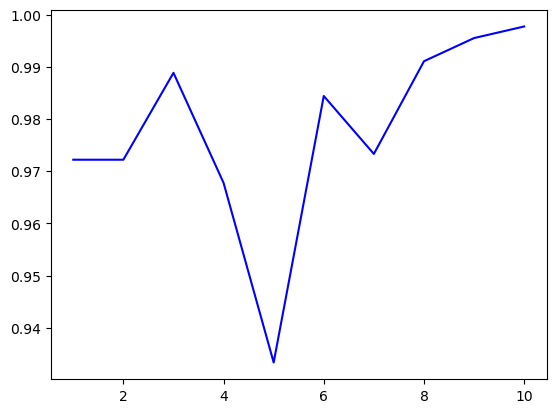

In [26]:
plt.plot(epoch,training_history.history['accuracy'],color='blue',label='Training Accuracy')
         

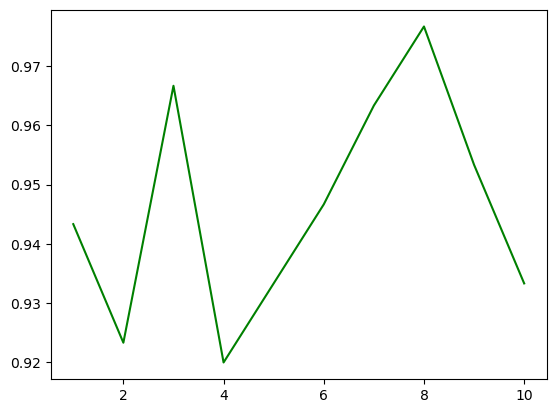

In [27]:
plt.plot(epoch,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')